In [1]:
#This Notebook will be used for the Capstone project

In [7]:
import numpy as np #importing numpy.
import pandas as pd #importing pandas.
import requests

In [8]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


# Introduction

During this project, I will analyse a study done on taco shops in San Antonio. I will conduct a statistic analysis to find out the neighborhood with the most taco shops, the best taco shop by Google from the study, the cheapest one and find out if there is a correlation between price and grades.

In a second part, we will analyse via a map in which neighborhood we will find out the most a taco shops in the Town.

# Load Data and Data Processing

In [270]:
# The code was removed by Watson Studio for sharing.

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
0,Donato's taco shop,California,1/18/2016,Northwest,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oscar's Mexican food,California,1/24/2016,Nogalitos/South Zarzamora,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Oscar's Mexican food,Carnitas,1/24/2016,Nogalitos/South Zarzamora,NaN,NaN,NaN,NaN,NaN,4.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oscar's Mexican food,Carne asada,1/24/2016,Nogalitos/South Zarzamora,NaN,NaN,NaN,NaN,NaN,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pollos Maria,California,1/27/2016,Midtown,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [271]:
df.shape

(385, 66)

In [279]:
df1 = df
df1.dropna(subset=['Address'], inplace=True)
df1.head()

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
0,Donato's taco shop,California,1/18/2016,Northwest,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oscar's Mexican food,California,1/24/2016,Nogalitos/South Zarzamora,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pollos Maria,California,1/27/2016,Midtown,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Nico's Taco Shop,California,1/30/2016,Huebner/Leon Creeks,3860 Valley Centre Dr #404,http://www.yelp.com/biz/nicos-taco-shop-san-diego,3.0,2.9,NaN,7.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Los Primos Mexican Food,Monster California,2/1/2016,Camelot 1,7770 Regents Rd,http://www.primosmex.com/,3.0,3.7,x,9.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Clean the data - mean I will delete every columns that are not useful in the project.

Remove columns - We will keep the location, Neighborhood, Adress, Google, Cost and Loc Columns

In [280]:
df1 = df1[['Location','Neighborhood','Address','Google','Cost']]

In [281]:
df1.head()

,Location,Neighborhood,Address,Google,Cost
0,Donato's taco shop,Northwest,6780 Miramar Rd,4.2,6.49
1,Oscar's Mexican food,Nogalitos/South Zarzamora,225 S Rancho Santa Fe Rd,3.3,5.45
4,Pollos Maria,Midtown,3055 Harding St,3.8,6.59
6,Nico's Taco Shop,Huebner/Leon Creeks,3860 Valley Centre Dr #404,2.9,7.19
8,Los Primos Mexican Food,Camelot 1,7770 Regents Rd,3.7,9.25


In [282]:
df1.shape

(83, 5)

# Data Visualization

We are going study and show :
    - the top10 neighborhoods with the most taco shops
    - the top10 graded by Google tacos shops
    - the top10 cheapest tacos shops
    
We are also going to check in there is any tacos shops both the in the top10 cheapest and top10 graded by Google
We are also going to visualize the top10 neighborhood in a map

Top 10 Neighborhood

In [290]:
df_count = df1.groupby(["Neighborhood"]).count().reset_index()
#df_count = df_count[['Neighborhood','Location']]
df_count.rename(columns={'Location':'Count of Location'}, inplace=True)
df_count_top10 = df_count.sort_values(['Count of Location'], ascending=False).head(10)

df_count_top10.head(10)

,Neighborhood,Count of Location,Address,Google,Cost
30,Pecan Valley,3,3,3,3
13,I-10 East Corridor,3,3,3,3
16,Lackland Annex,3,3,3,3
20,Mahncke Park/Westfort,3,3,3,3
37,Tanglewoodridge,2,2,2,2
38,Tobin Hill,2,2,2,2
23,Monte Vista,2,2,2,2
24,Near Northwest,2,2,2,2
25,Nogalitos/South Zarzamora,2,2,2,2
41,Westfort Alliance,2,2,2,2


In [72]:
import matplotlib.pyplot as plt

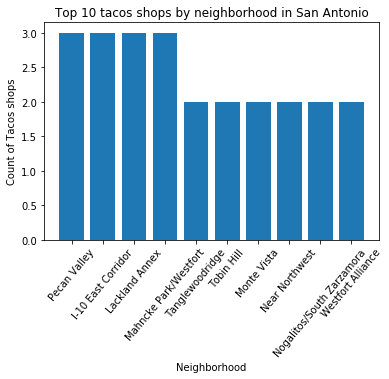

In [298]:
x = df_count_top10['Neighborhood']
y = df_count_top10['Count of Location']
plt.xlabel('Neighborhood')
plt.ylabel('Count of Tacos shops')
plt.title('Top 10 tacos shops by neighborhood in San Antonio')
plt.xticks(rotation=50)
plt.bar(x, y)
plt.show()

In [301]:
df_sum_grades = df.groupby(['Neighborhood'])[['Google','Cost']].mean().reset_index()
df_sum_grades.rename(columns={'Google':'Mean Google Grade','Cost':'Mean Cost'}, inplace=True)
df_sum_grades.sort_values(['Mean Google Grade'], ascending=False).head(10)

,Neighborhood,Mean Google Grade,Mean Cost
39,United Southwest,4.900000,8.590000
5,Eastern Triangle,4.700000,7.350000
36,Stinson Airport Vicinity,4.650000,10.100000
33,River Road,4.600000,6.475000
38,Tobin Hill,4.550000,6.475000
16,Lackland Annex,4.433333,7.290000
30,Pecan Valley,4.433333,6.843333
15,Lackland AFB,4.400000,8.250000
19,Mahncke Park,4.400000,6.250000
0,Arena District,4.350000,6.525000


In [302]:
df_sum_grades.sort_values(['Mean Cost'], ascending=True).head(10)

,Neighborhood,Mean Google Grade,Mean Cost
25,Nogalitos/South Zarzamora,4.000000,5.220000
21,Meadow Village,4.300000,5.490000
37,Tanglewoodridge,4.300000,5.890000
18,Lone Star,4.100000,5.935000
12,Huebner/Leon Creeks,3.400000,6.090000
23,Monte Vista,4.000000,6.095000
2,Camp Bullis,3.950000,6.100000
13,I-10 East Corridor,4.133333,6.163333
19,Mahncke Park,4.400000,6.250000
10,Guadalupe Westside,4.350000,6.270000


In [293]:
#merge df_count and df_sum grades
df_summary = pd.merge(df_count,df_sum_grades, on="Neighborhood")
df_summary[['Neighborhood','Count of Location','Mean Google Grade']].head(10)


,Neighborhood,Count of Location,Mean Google Grade
0,Arena District,2,4.35
1,Camelot 1,2,3.95
2,Camp Bullis,2,3.95
3,Dignowity Hill,2,4.30
4,Downtown,2,4.30
5,Eastern Triangle,1,4.70
6,Five Points,2,3.80
7,Fort Sam Houston,2,4.20
8,Government Hill,2,4.35
9,Greater Dellview,2,4.35


Visualize on the same graph the top10 count of location and its mean grade associated

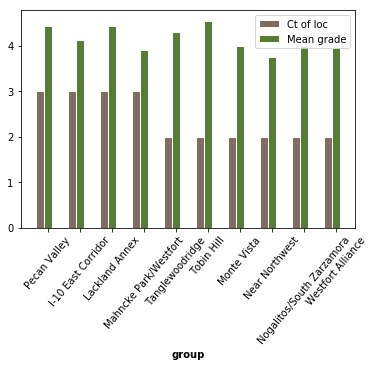

In [294]:
df_summary_top10 = df_summary.sort_values(['Count of Location'], ascending=False).head(10)
w=0.3


x = df_summary_top10['Neighborhood']
y1 = df_summary_top10['Count of Location']
y2 = df_summary_top10['Mean Google Grade']

barWidth = 0.25
 
 
# Set position of bar on X axis
r1 = np.arange(len(y1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, y1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Ct of loc')
plt.bar(r2, y2, color='#557f2d', width=barWidth, edgecolor='white', label='Mean grade')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(y1))], x)
plt.xticks(rotation=50)
 
# Create legend & Show graphic
plt.legend()
plt.show()



Grades by Google Analysis for best location

In [254]:
df_grades = df.sort_values(['Google'], ascending = False).head(10)
#df_grades

In [303]:
df_Bestburritoofsandiego = df_grades.drop(['Address','Cost'], axis=1)
df_Bestburritoofsandiego

,Location,Neighborhood,Google
341,Los Tacos 2,Stinson Airport Vicinity,5.0
50,Mikes Taco Club,United Southwest,4.9
25,Lola's 7 Up Market & Deli,River Road,4.9
362,Burrito Factory,Arena District,4.8
239,La Morena Taco Shop and Seafood,Tobin Hill,4.7
180,El Pueblo Mexican Food,Nogalitos/South Zarzamora,4.7
322,Lourdes,Eastern Triangle,4.7
52,La Perla Cocina,Lackland Annex,4.7
113,Taco Surf PB,Woodlawn Hills/ Ingram Hills,4.6
300,Mister Falafel,Pecan Valley,4.6


Find the cheapest taco shops

In [295]:
df_cost = df.sort_values(['Cost'], ascending = True).head(10)
df_cost

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
126,El Nopalito,Especial,6/1/2016,Lone Star,582 Santa Fe Dr,https://www.yelp.com/biz/el-nopalito-encinitas,4.0,4.0,x,4.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,El Pueblo Mexican Food,California,8/10/2016,Nogalitos/South Zarzamora,820 Birmingham Dr,https://www.yelp.com/biz/el-pueblo-authentic-m...,4.0,4.7,NaN,4.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,King Burrito,Adobada,8/16/2016,Huebner/Leon Creeks,3490 Marron Rd,https://www.yelp.com/biz/king-burrito-oceanside-2,4.0,3.9,NaN,4.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,Tacos La Bala,Pastor,9/5/2016,Meadow Village,5800 Bellaire Blvd,tacoslabala.com,4.5,4.1,NaN,4.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,Raul's Mexican food,Chile verde pork,3/11/2016,Mahncke Park/Westfort,490 S Coast Hwy 101,https://www.yelp.com/biz/rauls-shack-encinitas,4.0,4.2,NaN,5.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oscar's Mexican food,California,1/24/2016,Nogalitos/South Zarzamora,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,El Torrito Foods,Asada,9/25/2016,Tanglewoodridge,249 Emerald Dr,https://www.yelp.com/biz/el-torito-foods-vista-2,4.0,4.4,NaN,5.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,Juanita's Taco Shop,California,5/18/2016,Pecan Valley,290 N Coast Hwy 101,https://www.yelp.com/biz/juanitas-taco-shop-en...,4.0,4.5,NaN,5.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,Caliente Mexican Food,carne asada,7/6/2017,Downtown,11815 Sorrento Valley Rd,https://www.yelp.com/biz/caliente-mexican-food...,3.5,4.4,NaN,5.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,Gloria's Taco Shop,California,12/2/2016,Guadalupe Westside,1233 28th St,https://www.yelp.com/biz/glorias-taco-shop-san...,4.0,4.3,NaN,5.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Find if we have a top 10 grade and top 10 cheap taco shop

In [296]:
df_best = pd.merge(df_cost,df_grades, on="Location")
df_best

,Location,Burrito,Date,Neighborhood_x,Address_x,URL,Yelp,Google_x,Chips,Cost_x,...,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Neighborhood_y,Address_y,Google_y,Cost_y
0,El Pueblo Mexican Food,California,8/10/2016,Nogalitos/South Zarzamora,820 Birmingham Dr,https://www.yelp.com/biz/el-pueblo-authentic-m...,4.0,4.7,NaN,4.99,...,NaN,NaN,NaN,NaN,NaN,NaN,Nogalitos/South Zarzamora,820 Birmingham Dr,4.7,4.99


Visualize in a map the top10 tacos shops

In [199]:
import seaborn as sns

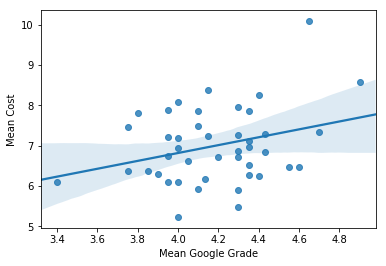

In [297]:
sns.regplot(x=df_sum_grades["Mean Google Grade"], y=df_sum_grades["Mean Cost"])

In [98]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

In [142]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

    altair:  4.1.0-py_1 conda-forge
    branca:  0.4.1-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


vincent-0.4.4        | 28 KB     | ##################################### | 1

  Charge san diego map

In [275]:
# San Antonio latitude and longitude values
latitude = 29.424349

longitude = -98.491142


# create map and display it
sanantonio_mapini = folium.Map(location=[latitude, longitude], zoom_start=11)

# display the map of San Francisco
sanantonio_mapini

In [208]:
#Read the json file
!wget --quiet  http://opendata-cosagis.opendata.arcgis.com/datasets/eed86115ac124b01b4acb1838077ac4a_0.geojson -O sa_counties.json
sa_geo = r'sa_counties.json'


In [277]:
# generate choropleth map
sanantonio_mapini.choropleth(
    geo_data=sa_geo,
    data=df_count,
    columns=['Neighborhood', 'Count of Location'],
    key_on='feature.properties.PlanName',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2
)

# display map
sanantonio_mapini

In [231]:
sanantonio_map2 = folium.Map(location=[latitude, longitude], zoom_start=11)
# generate choropleth map
sanantonio_map2.choropleth(
    geo_data=sa_geo,
    data=df_sum_grades,
    columns=['Neighborhood', 'Mean Google Grade'],
    key_on='feature.properties.PlanName',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2
)

# display map
sanantonio_map2